In [2]:
from __future__ import print_function
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
tf.reset_default_graph()

<h1>Define Hyper-perparmeter</h1>

In [4]:
batch_size = 64
num_classes = 10
epochs = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(np.shape(x_train))

(50000, 32, 32, 3)


<h1>Define Placeholder</h1>

In [5]:
# Input - Layer
model = Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(300, activation = "relu",input_shape=(50000,32*32*3), kernel_initializer=keras.initializers.glorot_normal(seed=None),
                bias_initializer=keras.initializers.Zeros()))
# Hidden - Layers
#model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(1024, activation = "sigmoid", kernel_initializer=keras.initializers.glorot_normal(seed=None),
                bias_initializer=keras.initializers.Zeros()))
#model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(1024, activation = "sigmoid", kernel_initializer=keras.initializers.glorot_normal(seed=None),
                bias_initializer=keras.initializers.Zeros()))
model.add(layers.Dense(1024, activation = "sigmoid", kernel_initializer=keras.initializers.glorot_normal(seed=None),
                bias_initializer=keras.initializers.Zeros()))
# Output- Layer
#model.add(layers.Flatten())
model.add(layers.Dense(10, activation = "softmax"))


<h1>Define Neural Network Architecture</h1>

<h1>Define cost andoptimization</h1>

In [6]:
# initiate RMSprop optimizer
#opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Instructions for updating:
Colocations handled automatically by placer.


<h1>Training and testing</h1>
<h2>1.Print out validation accuracy after each training poch</h2>
<h2>2.Print out training time you spend on each epoch</h2>
<h2>3.Print out testing accuracy in the end</h2>

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 116us/step - loss: 2.0230 - acc: 0.2400 - val_loss: 1.9156 - val_acc: 0.3058
Epoch 2/10
50000/50000 [==============================] - 4s 82us/step - loss: 1.7530 - acc: 0.3634 - val_loss: 1.6617 - val_acc: 0.3974
Epoch 3/10
50000/50000 [==============================] - 4s 82us/step - loss: 1.6488 - acc: 0.4029 - val_loss: 1.6038 - val_acc: 0.4276
Epoch 4/10
50000/50000 [==============================] - 4s 81us/step - loss: 1.5769 - acc: 0.4322 - val_loss: 1.5765 - val_acc: 0.4387
Epoch 5/10
50000/50000 [==============================] - 4s 81us/step - loss: 1.5165 - acc: 0.4564 - val_loss: 1.4905 - val_acc: 0.4686
Epoch 6/10
50000/50000 [==============================] - 4s 81us/step - loss: 1.4691 - acc: 0.4724 - val_loss: 1.4812 - val_acc: 0.4727
Epoch 7/10
50000/50000 [==============================] - 4s 82us/step - loss: 

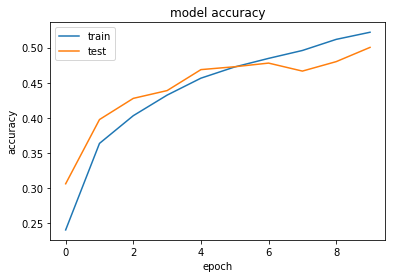

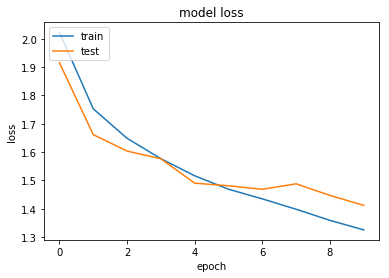

In [7]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [12]:
lossAndMetrics = model.evaluate(x_test, y_test)
print('loss and accuracy on test data:',lossAndMetrics)

10000/10000 [==============================] - 0s 42us/step
loss and accuracy on test data: [1.4121865634918214, 0.5003]


Different from problems with one dimension input, image input needs to be flattened before feed into the network. For this multi-classification model, I use sigmoid as activation function for hidden layers and softmax function for output layer. I have tried Rmsprop and Adam optimizer and the latter works better. The testing reasult is fairly close to the training result, which indicates that there is no overfitting.